1. Summary Statistics for Numerical Features
Purpose: Get a sense of central tendency (mean, median), spread (std, min, max), and missingness (after handling).
Features: Focus on numerical columns like winner_rank, loser_rank, minutes, w_ace, l_ace, winner_age, loser_age.

2. Distribution Analysis with Histograms
Purpose: Visualize the distribution of key numerical features to identify skewness, outliers, or multi-modality.
Features: minutes, winner_rank, loser_rank, w_ace, l_ace, winner_age, loser_age.

3. Categorical Feature Frequency Analysis
Purpose: Understand the distribution of categorical variables and identify rare categories.
Features: surface, tourney_level, winner_hand, loser_hand, round.

4. Temporal Analysis
Purpose: Examine trends over time since Elo ratings depend on match history.
Feature: tourney_date (now in datetime format after cleaning).

5. Correlation Analysis for Numerical Features
Purpose: Identify relationships between numerical features that might inform Elo adjustments.
Features: winner_rank, loser_rank, w_ace, l_ace, minutes, winner_age, loser_age.

6. Win Rate Analysis by Categorical Features
Purpose: Explore how categorical features affect outcomes, which can guide Elo adjustments (e.g., surface-specific Elo).
Features: surface, tourney_level, winner_hand, loser_hand.

7. Outlier Detection
Purpose: Confirm that outliers are handled (e.g., minutes capped at 300) and check others.
Features: w_ace, l_ace, winner_rank, loser_rank.

8. Player-Level Analysis
Purpose: Understand player activity and performance, crucial for Elo ratings.
Features: winner_name, loser_name, winner_rank, loser_rank.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("atp_matches_2010_2024_missing_handled.csv")

In [2]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-339,Brisbane,Hard,32,A,20100103,1,104053,Andy Roddick,R,...,34.0,29.0,11.0,10.0,3.0,5.0,7.0,4410.0,77.0,598.0
1,2010-339,Brisbane,Hard,32,A,20100103,30,103285,Radek Stepanek,R,...,27.0,14.0,7.0,7.0,3.0,7.0,12.0,2625.0,13.0,2610.0
2,2010-339,Brisbane,Hard,32,A,20100103,29,104053,Andy Roddick,R,...,43.0,34.0,21.0,13.0,10.0,12.0,7.0,4410.0,20.0,1655.0
3,2010-339,Brisbane,Hard,32,A,20100103,28,103285,Radek Stepanek,R,...,40.0,25.0,11.0,10.0,6.0,10.0,12.0,2625.0,105.0,521.0
4,2010-339,Brisbane,Hard,32,A,20100103,27,104792,Gael Monfils,R,...,50.0,38.0,17.0,14.0,3.0,6.0,13.0,2610.0,44.0,935.0


In [3]:
df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
42509,2024-7696,Next Gen Finals,Hard,8,F,20241218,387,210460,Nishesh Basavareddy,R,...,44.0,27.0,18.0,12.0,6.0,11.0,138.0,440.0,50.0,1115.0
42510,2024-7696,Next Gen Finals,Hard,8,F,20241218,388,209414,Luca Van Assche,R,...,50.0,35.0,9.0,11.0,11.0,13.0,128.0,471.0,50.0,1115.0
42511,2024-7696,Next Gen Finals,Hard,8,F,20241218,389,210506,Alex Michelsen,R,...,48.0,35.0,15.0,12.0,4.0,7.0,41.0,1245.0,138.0,440.0
42512,2024-7696,Next Gen Finals,Hard,8,F,20241218,391,210506,Alex Michelsen,R,...,14.0,9.0,0.0,3.0,1.0,2.0,41.0,1245.0,50.0,1115.0
42513,2024-7696,Next Gen Finals,Hard,8,F,20241218,395,211663,Joao Fonseca,R,...,45.0,34.0,22.0,13.0,7.0,11.0,145.0,409.0,20.0,2355.0


In [5]:
df.shape

(42514, 45)

In [6]:
df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,42514.000000,4.251400e+04,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,...,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000,42514.000000
mean,57.197958,2.016907e+07,157.444089,116726.434727,187.294491,27.109352,116675.361081,186.429459,27.124274,3.438256,...,46.520135,31.193701,13.919485,11.644047,4.457214,7.980336,92.345110,1888.762196,156.761984,1101.281954
std,41.965620,4.393934e+04,150.374786,28750.395206,7.267398,4.141591,28553.613878,7.099226,4.272932,0.827321,...,22.335457,16.264910,7.765086,5.111691,3.365323,4.508135,259.395258,2321.127005,398.029388,1290.503631
min,2.000000,2.010010e+07,1.000000,100644.000000,3.000000,14.900000,100644.000000,3.000000,14.500000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,32.000000,2.013061e+07,18.000000,104557.500000,183.000000,24.100000,104571.000000,183.000000,24.000000,3.000000,...,34.000000,21.000000,9.000000,9.000000,2.000000,5.000000,17.000000,660.000000,36.000000,510.250000
50%,32.000000,2.017021e+07,149.000000,105226.000000,188.000000,26.900000,105341.000000,185.000000,27.000000,3.000000,...,45.000000,30.000000,13.000000,11.000000,4.000000,8.000000,44.000000,1025.500000,67.000000,779.000000
75%,96.000000,2.021051e+07,281.000000,106421.000000,191.000000,29.900000,106423.000000,191.000000,30.100000,3.000000,...,59.000000,40.000000,18.000000,15.000000,6.000000,11.000000,84.000000,2020.000000,114.000000,1200.000000
max,128.000000,2.024122e+07,1701.000000,212721.000000,211.000000,44.600000,212970.000000,211.000000,44.000000,5.000000,...,328.000000,284.000000,101.000000,91.000000,27.000000,38.000000,3000.000000,16950.000000,3000.000000,16950.000000


Targetting Numerical Features now:

In [7]:
numerical_cols = [
    "draw_size", "tourney_date", "winner_ht", "winner_age", "loser_ht", "loser_age",
    "minutes", "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms",
    "w_bpSaved", "w_bpFaced", "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon",
    "l_SvGms", "l_bpSaved", "l_bpFaced", "winner_rank", "winner_rank_points", "loser_rank",
    "loser_rank_points"
]
print("Summary Statistics for Numerical Features:")
print(df[numerical_cols].describe())

Summary Statistics for Numerical Features:
          draw_size  tourney_date     winner_ht    winner_age      loser_ht  \
count  42514.000000  4.251400e+04  42514.000000  42514.000000  42514.000000   
mean      57.197958  2.016907e+07    187.294491     27.109352    186.429459   
std       41.965620  4.393934e+04      7.267398      4.141591      7.099226   
min        2.000000  2.010010e+07      3.000000     14.900000      3.000000   
25%       32.000000  2.013061e+07    183.000000     24.100000    183.000000   
50%       32.000000  2.017021e+07    188.000000     26.900000    185.000000   
75%       96.000000  2.021051e+07    191.000000     29.900000    191.000000   
max      128.000000  2.024122e+07    211.000000     44.600000    211.000000   

          loser_age       minutes         w_ace          w_df        w_svpt  \
count  42514.000000  42514.000000  42514.000000  42514.000000  42514.000000   
mean      27.124274    109.964388      6.721621      2.430588     73.673707   
std     

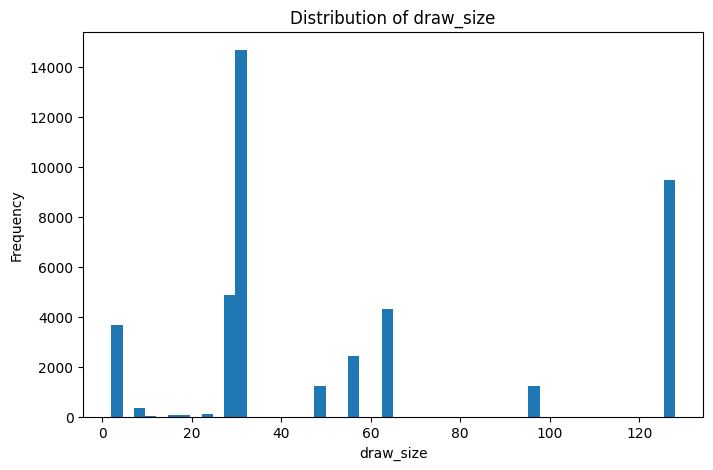

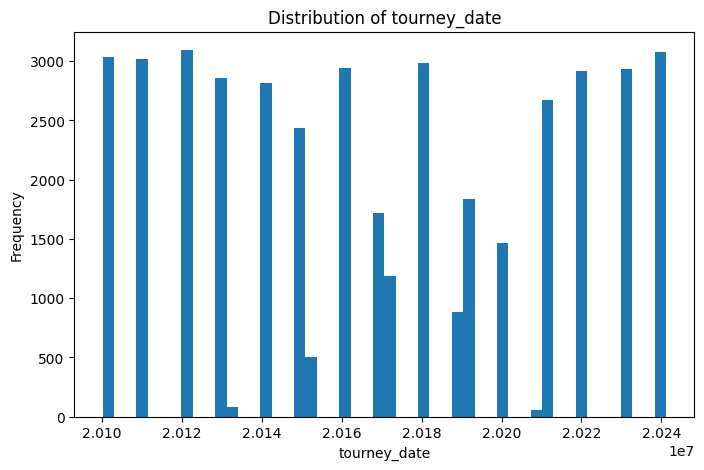

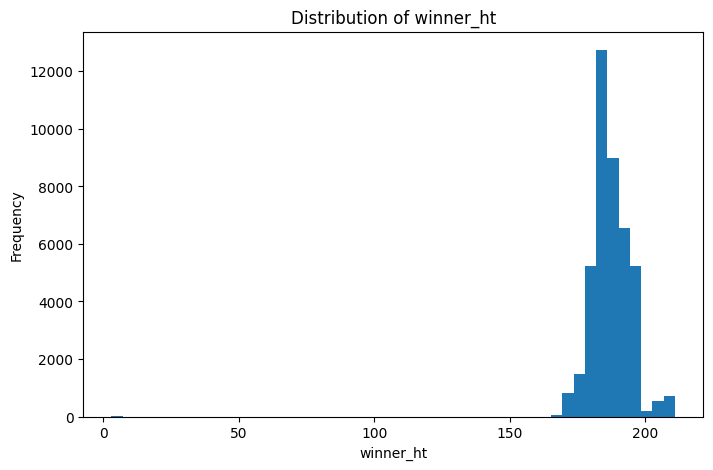

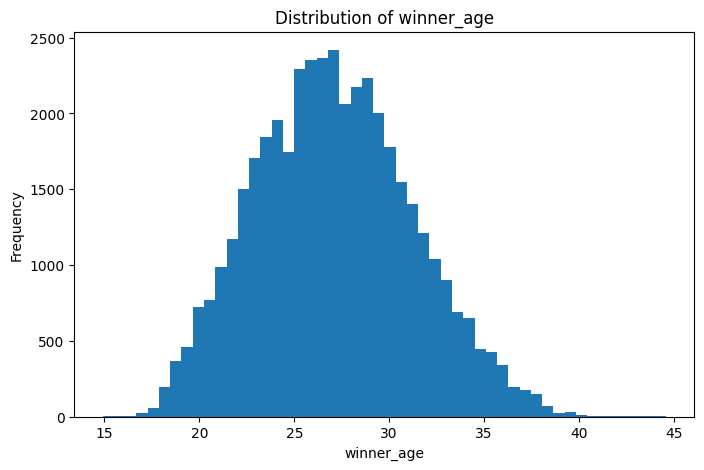

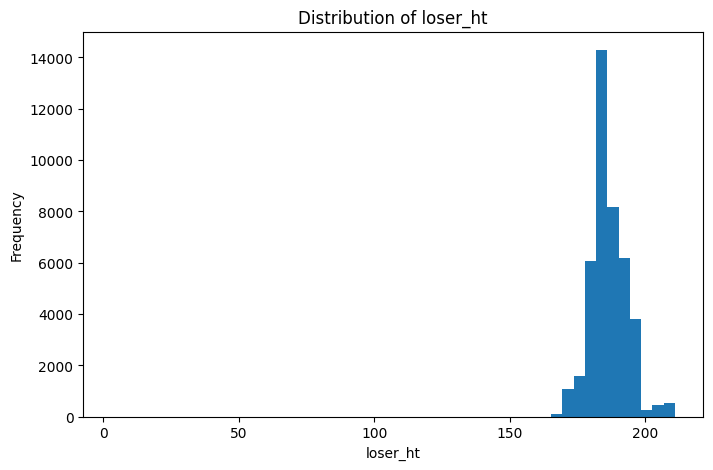

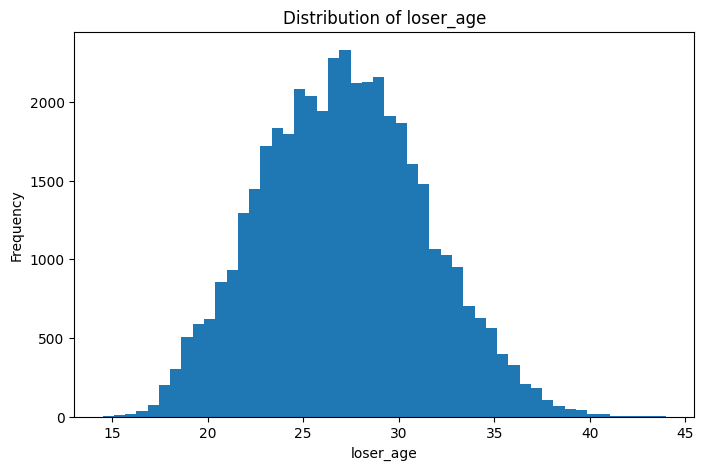

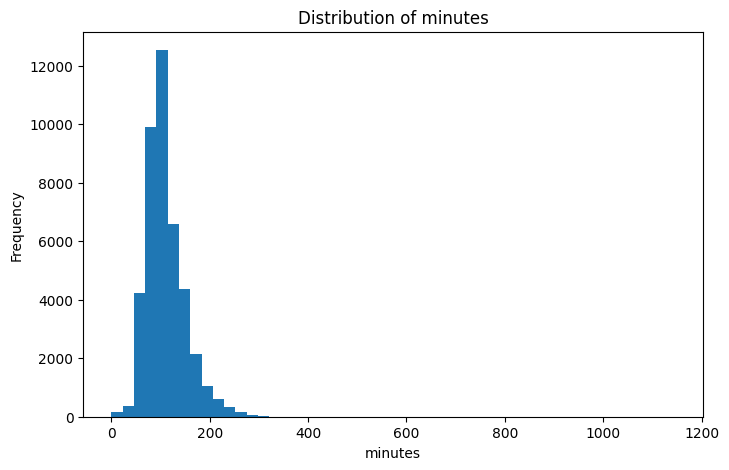

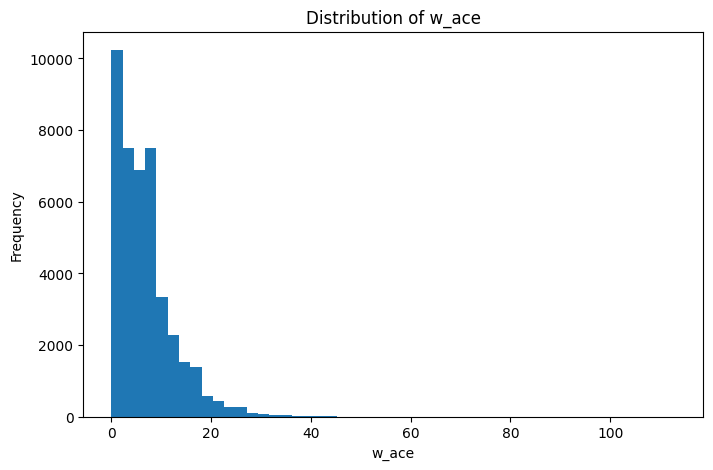

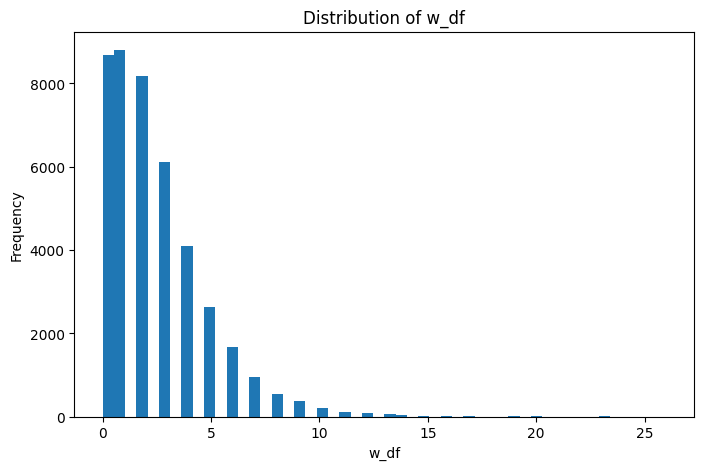

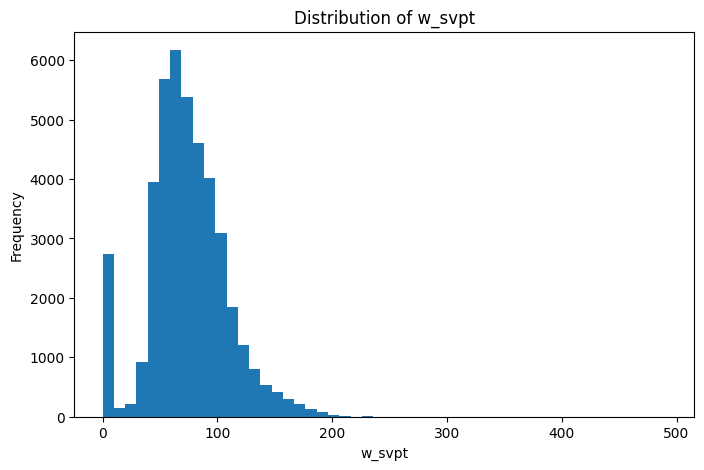

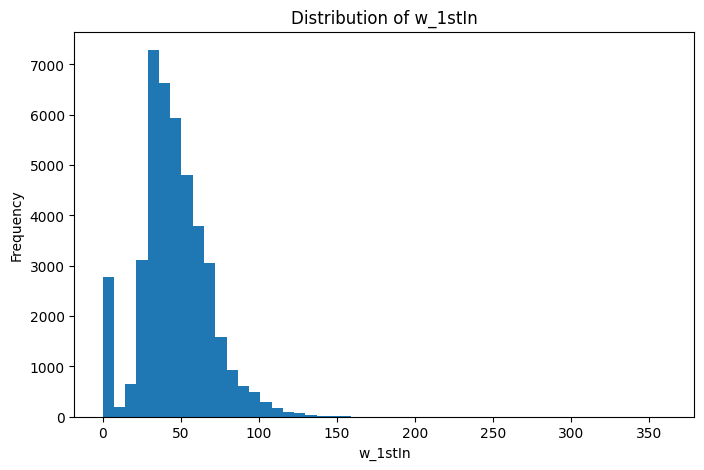

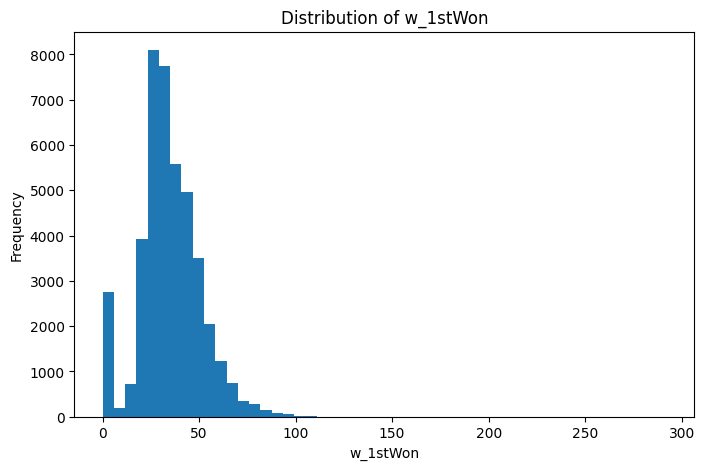

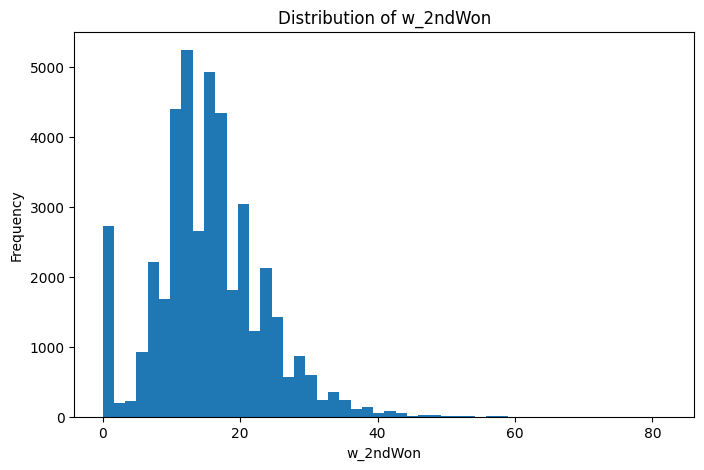

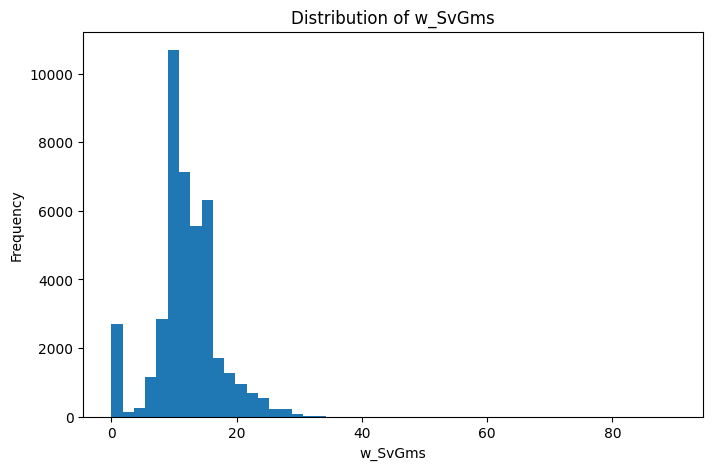

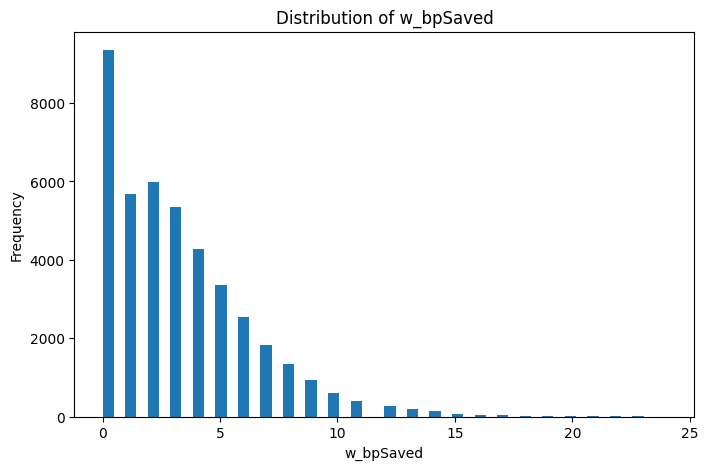

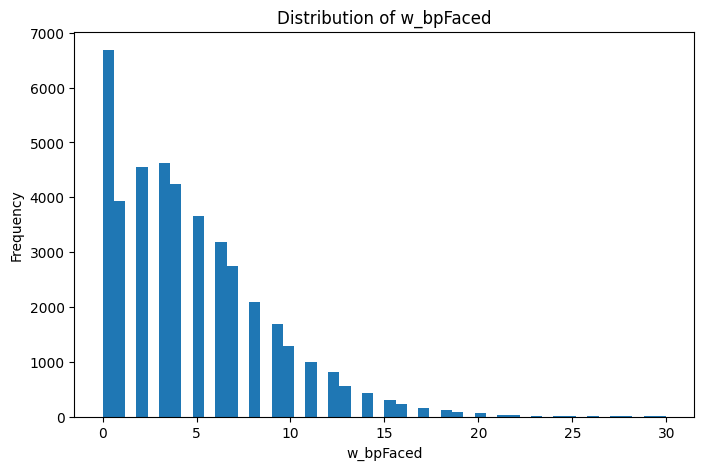

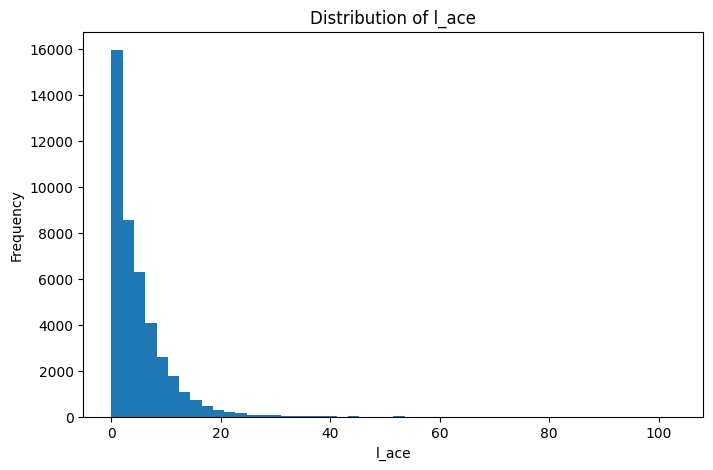

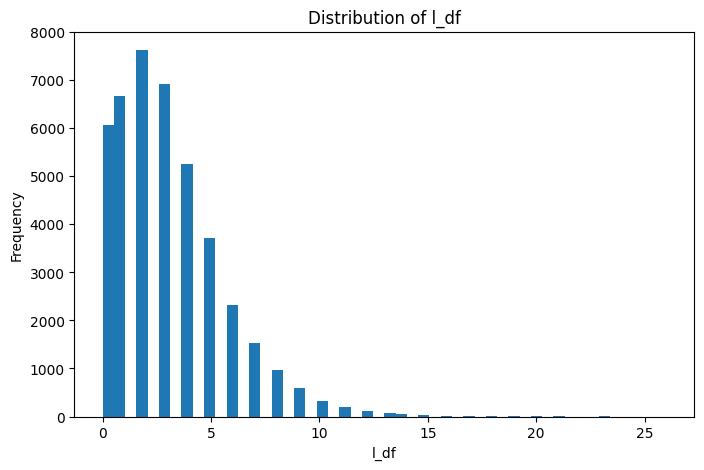

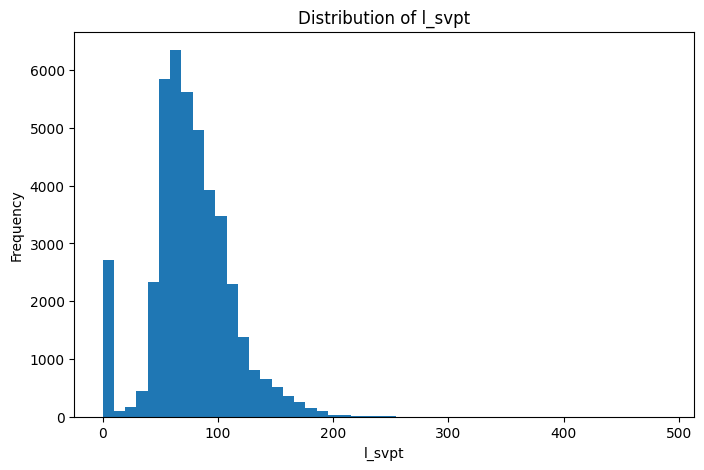

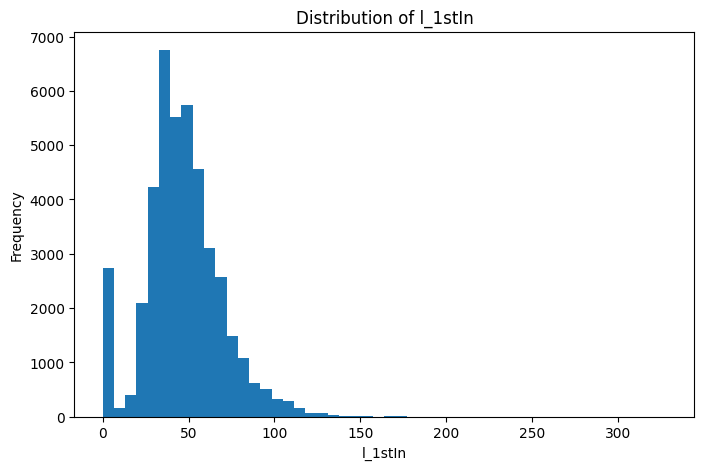

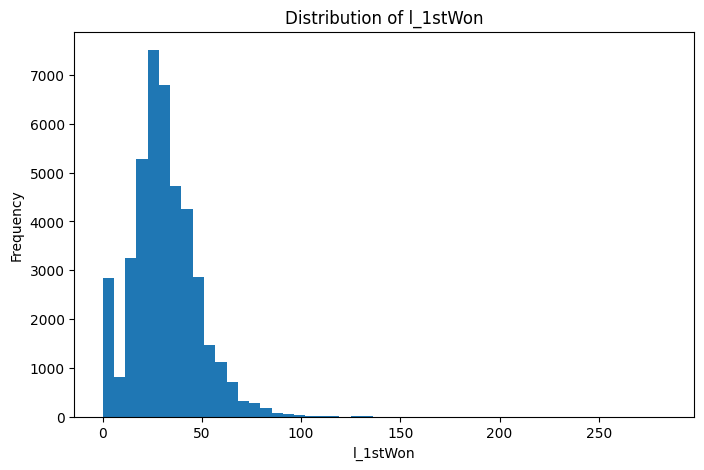

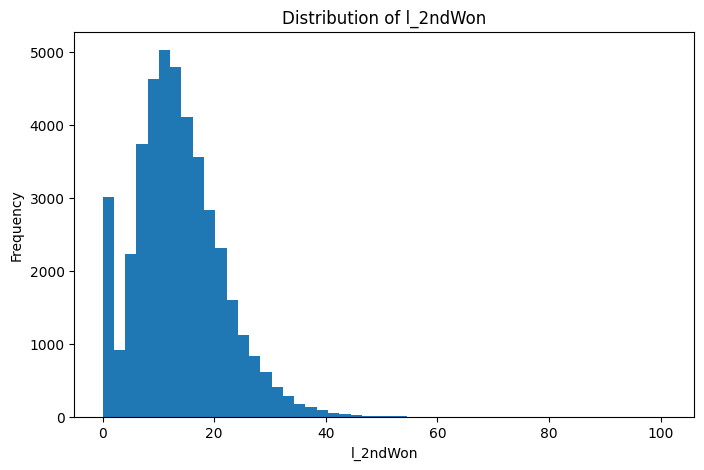

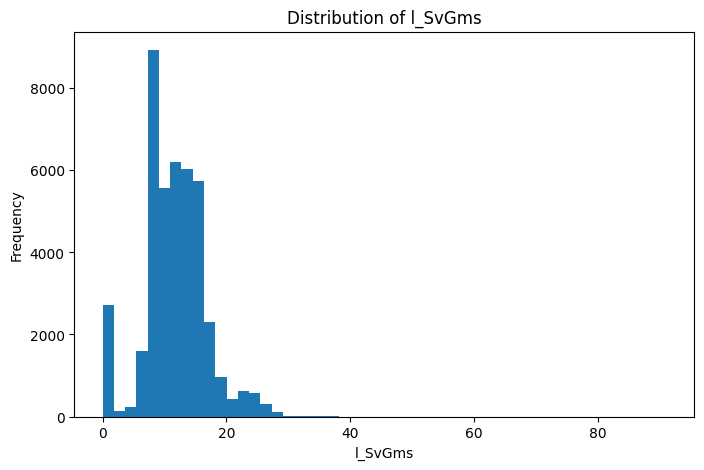

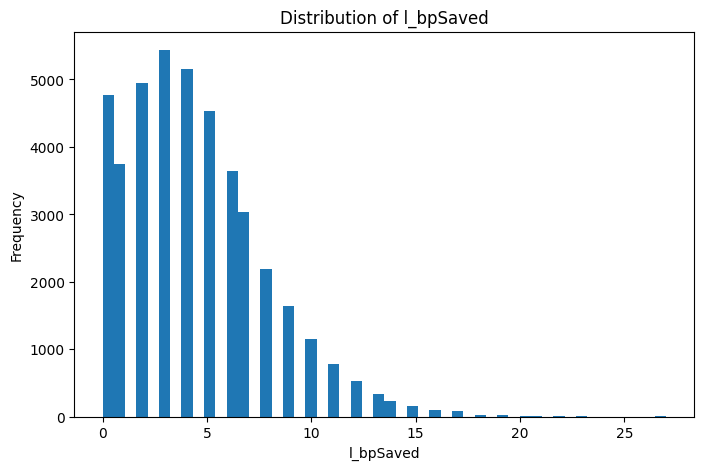

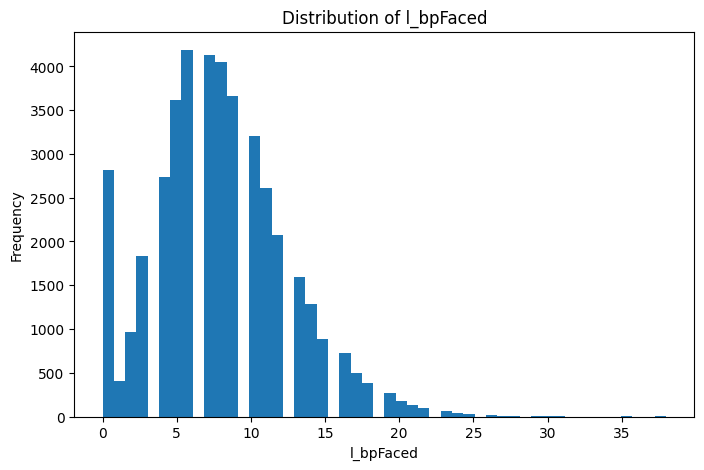

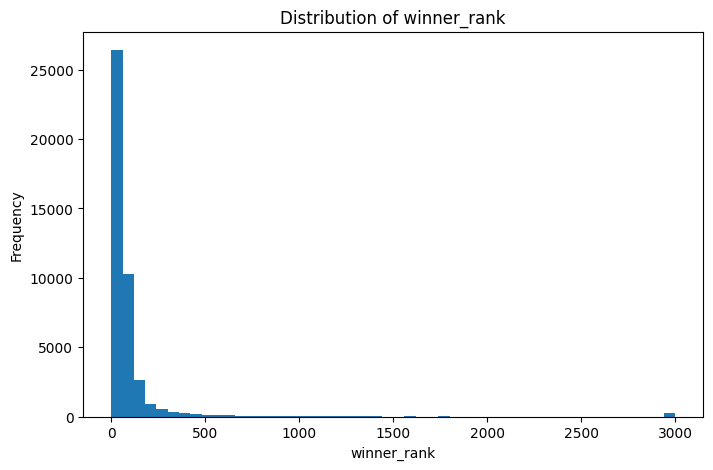

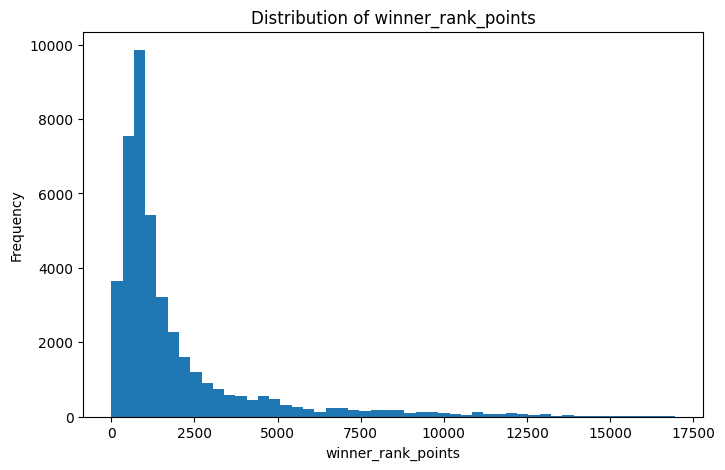

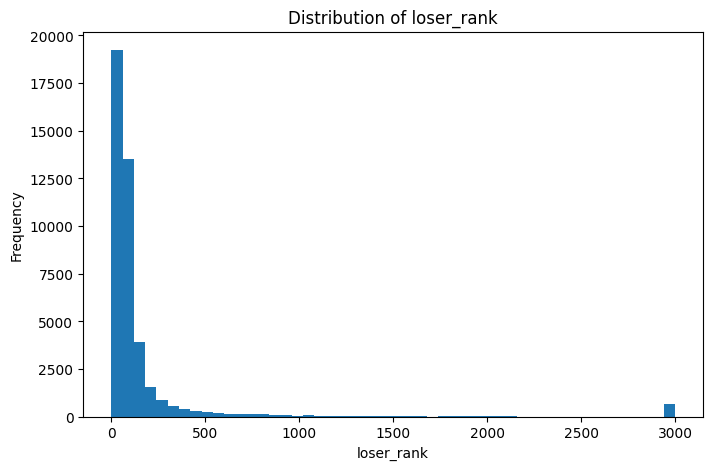

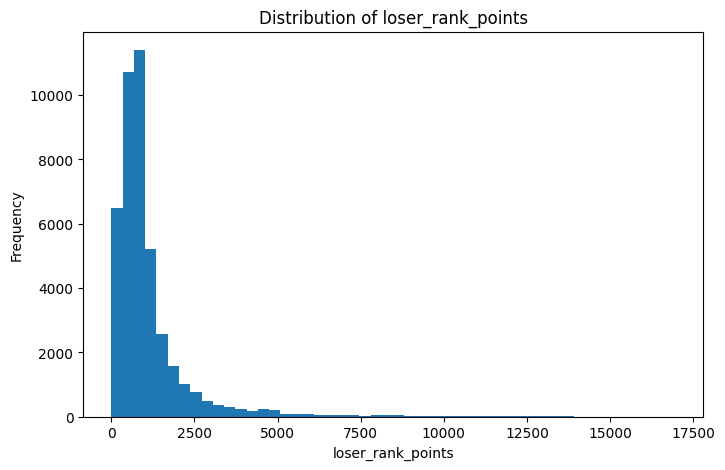

In [12]:
key_numerical = ['draw_size', 'tourney_date', 'winner_ht', 'winner_age', 'loser_ht', 'loser_age', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']
for col in key_numerical:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Targetting Categorical Features now:


Categorical Feature Frequencies:

surface value counts:
surface
Hard      24789
Clay      13142
Grass      4517
Carpet       66
Name: count, dtype: int64


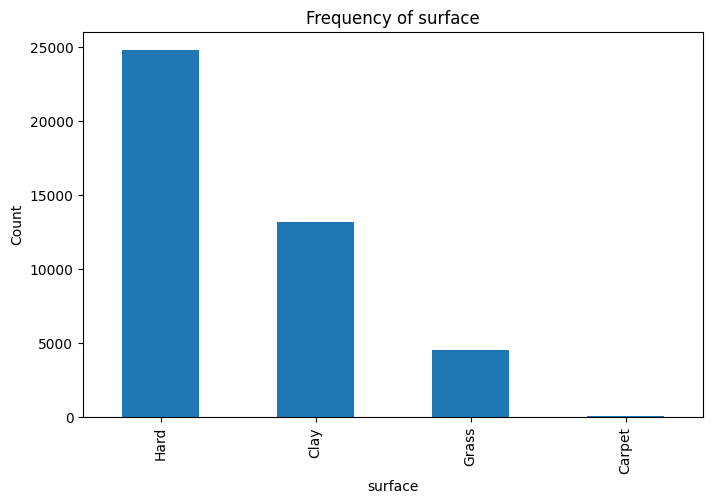


tourney_level value counts:
tourney_level
A    22763
M     8248
G     7493
D     3659
F      287
O       64
Name: count, dtype: int64


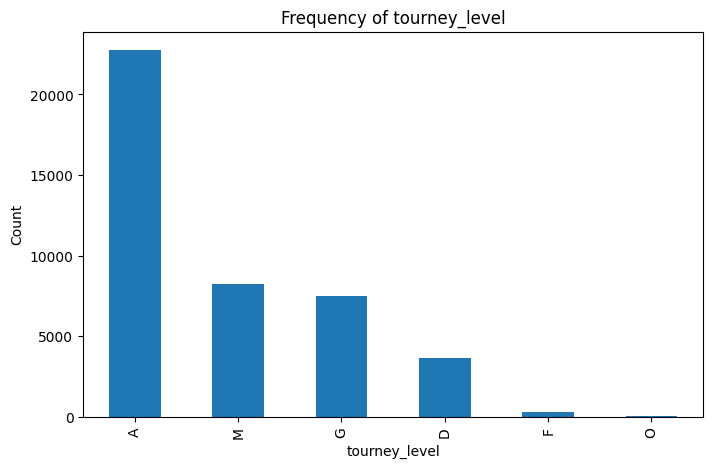


winner_hand value counts:
winner_hand
R    36865
L     5550
U       98
A        1
Name: count, dtype: int64


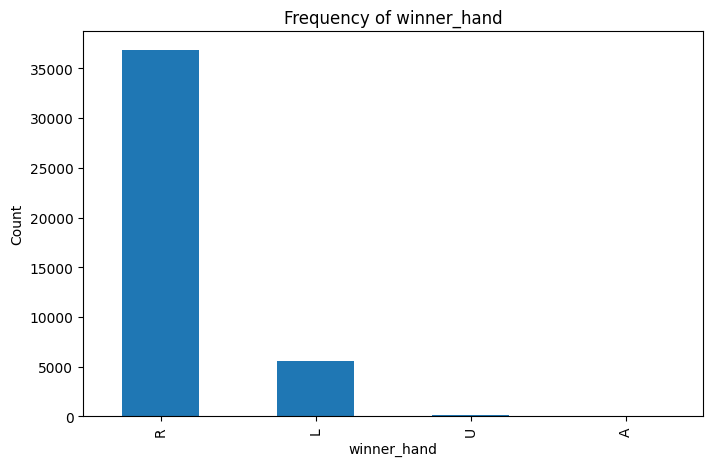


round value counts:
round
R32     13048
R16      7488
R64      6197
R128     4864
RR       4248
QF       3756
SF       1934
F         973
BR          6
Name: count, dtype: int64


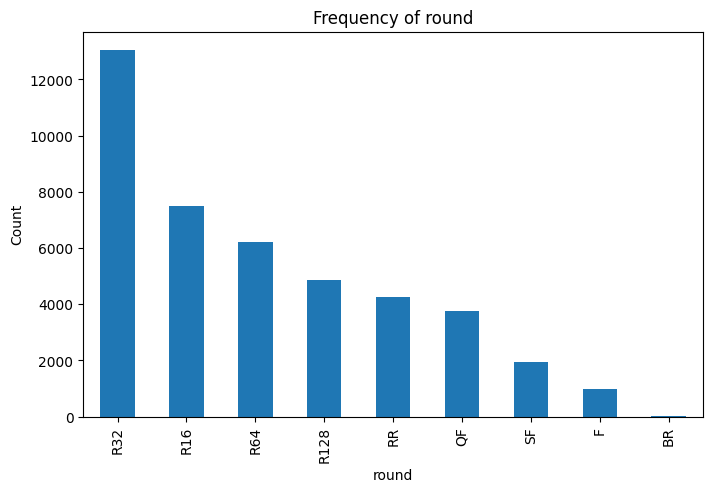

In [15]:
categorical_cols = [
    "tourney_id", "tourney_name", "surface", "tourney_level", "match_num",
    "winner_id", "winner_name", "winner_hand", "winner_ioc", "loser_id",
    "loser_name", "loser_hand", "loser_ioc", "score", "best_of", "round"
]
print("\nCategorical Feature Frequencies:")
for col in ["surface", "tourney_level", "winner_hand", "round"]:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Temporal Analysis

In [19]:
df["tourney_date"] = pd.to_datetime(df["tourney_date"])
df["year"] = df["tourney_date"].dt.year

Correlation Analysis for all numerical features:


Correlation Matrix for All Numerical Features:
                    draw_size  tourney_date  winner_ht  winner_age  loser_ht  \
draw_size            1.000000      0.090560   0.051876    0.044957  0.027114   
tourney_date         0.090560      1.000000   0.057718   -0.003372  0.045245   
winner_ht            0.051876      0.057718   1.000000   -0.096830  0.023866   
winner_age           0.044957     -0.003372  -0.096830    1.000000  0.015636   
loser_ht             0.027114      0.045245   0.023866    0.015636  1.000000   
loser_age            0.064885      0.039416   0.021269    0.036633 -0.068955   
minutes              0.354920      0.087780  -0.008232    0.014138  0.038957   
w_ace                0.271642      0.044847   0.407647    0.048486  0.013333   
w_df                 0.241124      0.048690   0.066176    0.012262  0.016049   
w_svpt               0.463514      0.093875   0.033424    0.058729  0.069179   
w_1stIn              0.448581      0.111741   0.047503    0.059005  0.08

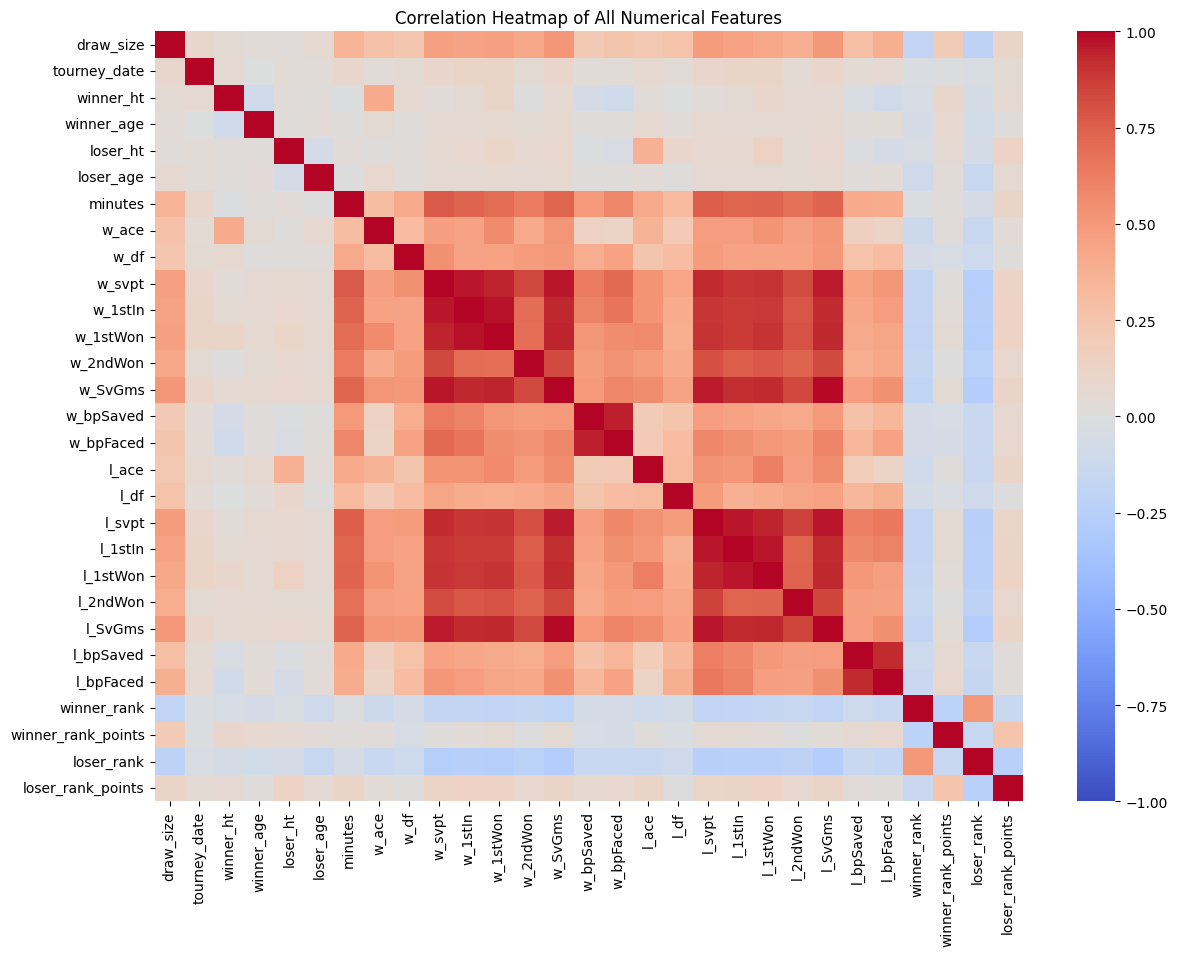

In [21]:
# Use only numerical columns for correlation
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix for All Numerical Features:")
print(correlation_matrix)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Numerical Features")
plt.show()

Win rate analysis by surface:


Win Rates of Top Players by Surface:
                   Player Surface  Win Rate
0          Novak Djokovic    Hard  0.872274
1          Novak Djokovic    Clay  0.833333
2          Novak Djokovic  Carpet  0.000000
3          Novak Djokovic   Grass  0.897196
4            Rafael Nadal    Hard  0.783217
...                   ...     ...       ...
4419         Jose Benitez   Grass  0.000000
4420  Nishesh Basavareddy    Hard  0.333333
4421  Nishesh Basavareddy    Clay  0.000000
4422  Nishesh Basavareddy  Carpet  0.000000
4423  Nishesh Basavareddy   Grass  0.000000

[4424 rows x 3 columns]


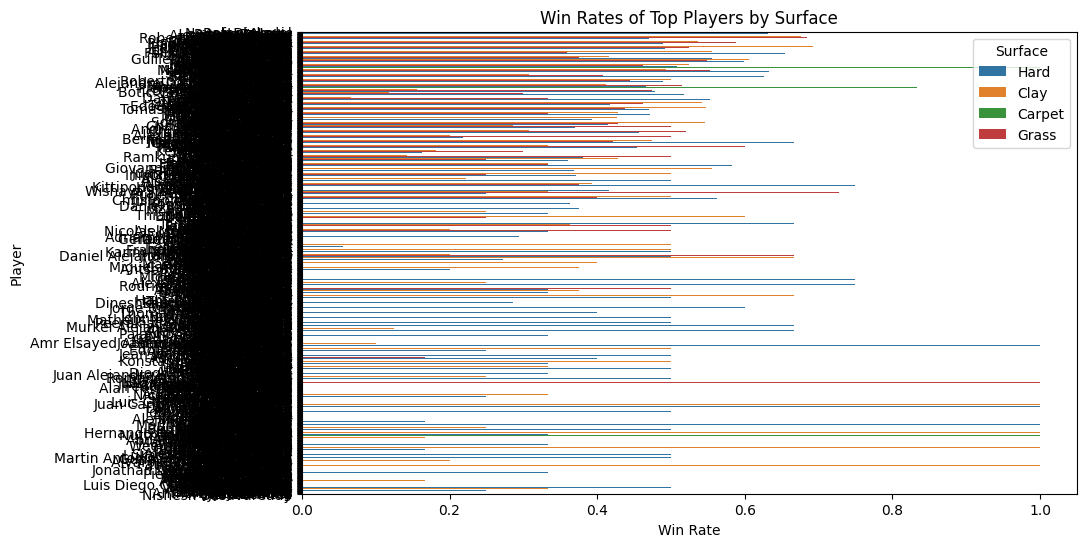

In [23]:
top_players = df["winner_name"].value_counts().index
win_rates = {}
for player in top_players:
    player_matches = df[(df["winner_name"] == player) | (df["loser_name"] == player)]
    for surface in df["surface"].unique():
        surface_matches = player_matches[player_matches["surface"] == surface]
        wins = len(surface_matches[surface_matches["winner_name"] == player])
        total = len(surface_matches)
        win_rates[(player, surface)] = wins / total if total > 0 else 0
win_rates_df = pd.DataFrame(win_rates, index=["Win Rate"]).T.reset_index()
win_rates_df.columns = ["Player", "Surface", "Win Rate"]
print("\nWin Rates of Top Players by Surface:")
print(win_rates_df)
plt.figure(figsize=(10, 6))
sns.barplot(data=win_rates_df, x="Win Rate", y="Player", hue="Surface")
plt.title("Win Rates of Top Players by Surface")
plt.show()

I don't think win rate makes much of a difference.

Outlier detection with boxplots.

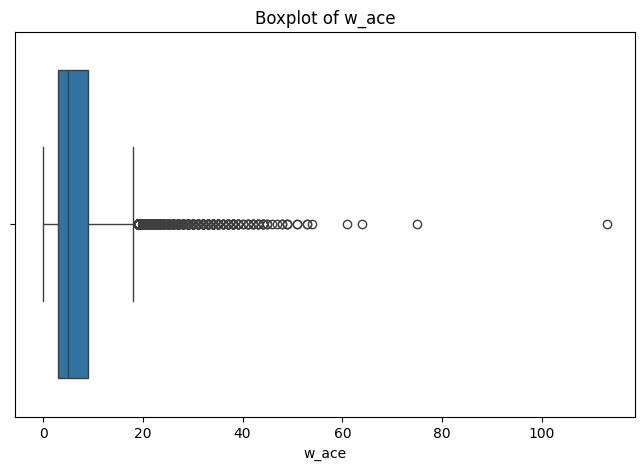

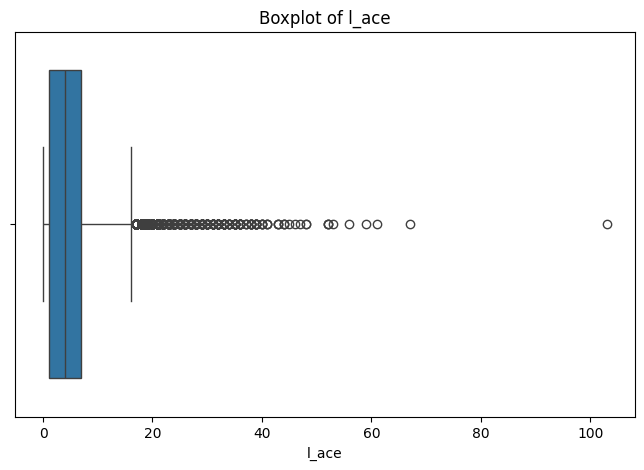

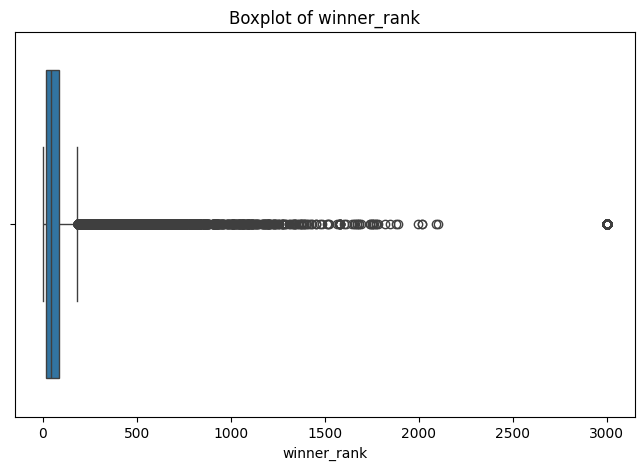

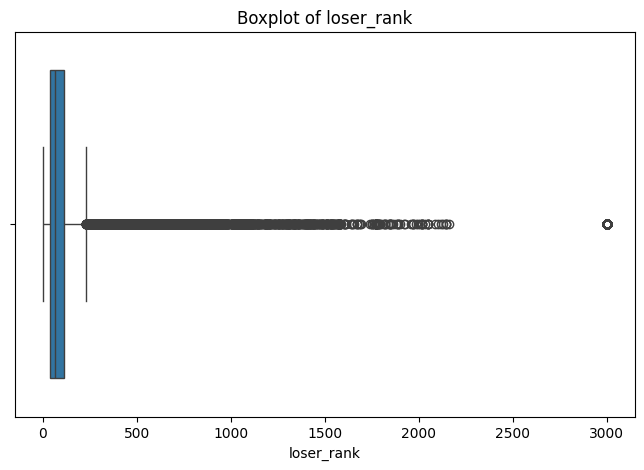

In [24]:
for col in ["w_ace", "l_ace", "winner_rank", "loser_rank"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Player level analysis


Top 10 Players by Total Matches:
                       Total Matches   Wins  Win Percentage
Novak Djokovic                1013.0  876.0           86.48
Rafael Nadal                   829.0  686.0           82.75
Marin Cilic                    758.0  488.0           64.38
Grigor Dimitrov                745.0  460.0           61.74
John Isner                     721.0  443.0           61.44
Fabio Fognini                  719.0  384.0           53.41
Andy Murray                    718.0  527.0           73.40
Richard Gasquet                714.0  424.0           59.38
Roger Federer                  700.0  582.0           83.14
Roberto Bautista Agut          692.0  422.0           60.98


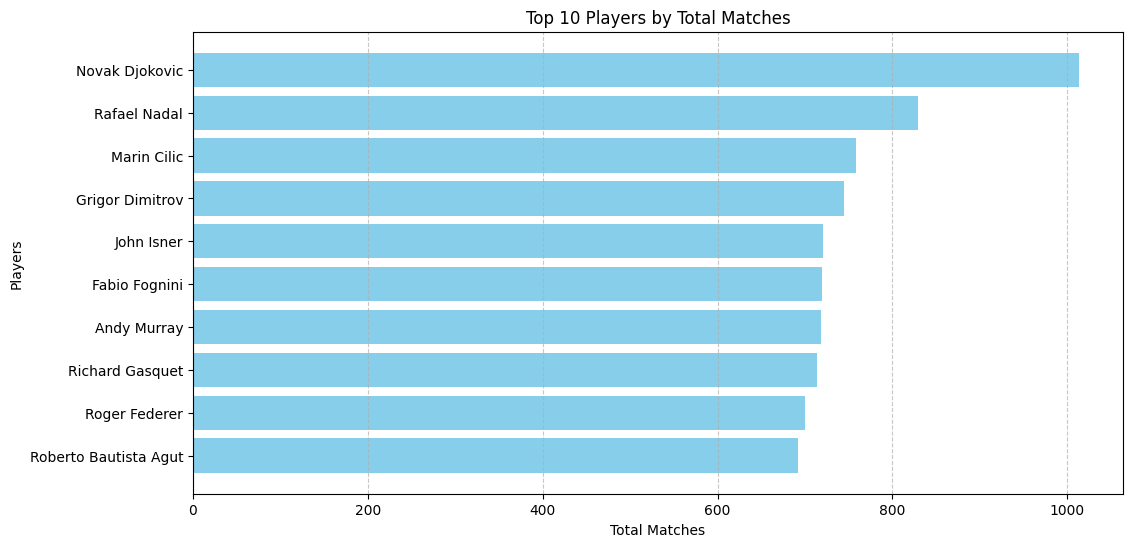

In [32]:
player_wins = df["winner_name"].value_counts()
player_losses = df["loser_name"].value_counts()
total_matches = player_wins.add(player_losses, fill_value=0)
win_percentage = (player_wins / total_matches * 100).round(2)
player_stats = pd.DataFrame({
    "Total Matches": total_matches,
    "Wins": player_wins,
    "Win Percentage": win_percentage
}).fillna(0)
player_stats = player_stats.sort_values("Total Matches", ascending=False)
print("\nTop 10 Players by Total Matches:")
print(player_stats.head(10))

plt.figure(figsize=(12, 6))
plt.barh(player_stats.head(10).index[::-1], player_stats.head(10)["Total Matches"][::-1], color='skyblue')
# Add labels and title
plt.xlabel("Total Matches")
plt.ylabel("Players")
plt.title("Top 10 Players by Total Matches")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [26]:
player_stats

,Total Matches,Wins,Win Percentage
Novak Djokovic,1013.0,876.0,86.48
Rafael Nadal,829.0,686.0,82.75
Marin Cilic,758.0,488.0,64.38
Grigor Dimitrov,745.0,460.0,61.74
John Isner,721.0,443.0,61.44
...,...,...,...
Jack Loutit,1.0,1.0,100.00
Jack Mingjie Lin,1.0,0.0,0.00
Roberto Ortega Olmedo,1.0,0.0,0.00
Jae Min Seol,1.0,0.0,0.00


drop 'tourney_date' because we have tourney_id as a unique identifier.

In [42]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-339,Brisbane,Hard,32,A,1,104053,Andy Roddick,R,188.0,...,34.0,29.0,11.0,10.0,3.0,5.0,7.0,4410.0,77.0,598.0
1,2010-339,Brisbane,Hard,32,A,30,103285,Radek Stepanek,R,185.0,...,27.0,14.0,7.0,7.0,3.0,7.0,12.0,2625.0,13.0,2610.0
2,2010-339,Brisbane,Hard,32,A,29,104053,Andy Roddick,R,188.0,...,43.0,34.0,21.0,13.0,10.0,12.0,7.0,4410.0,20.0,1655.0
3,2010-339,Brisbane,Hard,32,A,28,103285,Radek Stepanek,R,185.0,...,40.0,25.0,11.0,10.0,6.0,10.0,12.0,2625.0,105.0,521.0
4,2010-339,Brisbane,Hard,32,A,27,104792,Gael Monfils,R,193.0,...,50.0,38.0,17.0,14.0,3.0,6.0,13.0,2610.0,44.0,935.0


In [45]:
explored_df = df.copy()
explored_df.head

<bound method NDFrame.head of       tourney_id     tourney_name surface  draw_size tourney_level  match_num  \
0       2010-339         Brisbane    Hard         32             A          1   
1       2010-339         Brisbane    Hard         32             A         30   
2       2010-339         Brisbane    Hard         32             A         29   
3       2010-339         Brisbane    Hard         32             A         28   
4       2010-339         Brisbane    Hard         32             A         27   
...          ...              ...     ...        ...           ...        ...   
42509  2024-7696  Next Gen Finals    Hard          8             F        387   
42510  2024-7696  Next Gen Finals    Hard          8             F        388   
42511  2024-7696  Next Gen Finals    Hard          8             F        389   
42512  2024-7696  Next Gen Finals    Hard          8             F        391   
42513  2024-7696  Next Gen Finals    Hard          8             F        395  

In [47]:
explored_df.to_csv("explored_handled_atp_2010_2024_data.csv", index=False)
print(f"Saved cleaned, handled dataset after being explored: {len(explored_df)} rows, {len(explored_df.columns)} columns.")

Saved cleaned, handled dataset after being explored: 42514 rows, 44 columns.
